# 四年之变
## 序言
为了探究疫情前的19年与后疫情时代的23年间, 科技区媒体组织们关注点发生的变化, 我将采取对科技区新闻标题和正文进行数据分析的方式对其进行揭示。

## 先行准备
爬取的数据: 2023年4-7月的新浪科技区新闻(约有8k条), 2019年1-11月的新浪科技区新闻(约有2k条)
分析库：分词库jieba，词云库wordcloud，sklearn
辅助工具：数学工具NPM三大头，文本导入工具，PCA降维工具

In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import os
import sys
import json
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
jieba.initialize()
matplotlib.rc("font",family='YouYuan')  # 设置字体
plt.rcParams['font.sans-serif'] = ['YouYuan']

预先准备一个停用词库。

In [7]:
with open('banns.txt', encoding='utf-8') as f:
    wsx = f.readlines()
    stop_words = set(item.replace("\n", "") for item in wsx)

首先我们需要对23年的文章和19年的文章在屏蔽无意义词后分别做分词得到词频表。

In [2]:
# 以下是23年的
direc_path = "D:\\involuntary\\works\\missing-semester-of-python\\part1\\websites"

    
titles_cart_now = {}
articles_cart_now = {}
for file in os.listdir(direc_path):
    with open(f'{direc_path}\\{file}\\config.json', encoding='utf-8') as f:
        jas = json.loads(f.read())
        apd = [word for word in jieba.analyse.extract_tags(sentence=jas['title'], topK=7, withWeight=False, allowPOS=()) if word not in stop_words]
        for item in apd:
            if item in titles_cart_now.keys():
                titles_cart_now[item] += 1
            else:
                titles_cart_now[item] = 1
        
    with open(f'{direc_path}\\{file}\\article.txt', encoding='utf-8') as f:
        whatx = f.readlines()
        for whatxx in whatx:
            apd = [word for word in jieba.cut(whatxx.strip()) if word not in stop_words and len(word) > 1]
            for item in apd:
                if item in articles_cart_now.keys():
                    articles_cart_now[item] += 1
                else:
                    articles_cart_now[item] = 1


titles_cart_now = {k: v for k,v in sorted(titles_cart_now.items(), key=lambda item:(-item[1], item[0]))}
with open('titles_cart_now.txt', 'w', encoding='utf-8') as f:
    for k,v in titles_cart_now.items():
        f.write(f"({k}, {v})\n")
articles_cart_now = {k: v for k,v in sorted(articles_cart_now.items(), key=lambda item:(-item[1], item[0]))}
with open('articles_cart_now.txt', 'w', encoding='utf-8') as f:
    for k,v in articles_cart_now.items():
        f.write(f"({k}, {v})\n")
print(titles_cart_now)
print(articles_cart_now)

{'AI': 551, '苹果': 529, '马斯克': 271, '微软': 261, '特斯拉': 254, '华为': 230, 'iPhone': 204, '小米': 198, 'CEO': 185, '模型': 177, '曝光': 175, 'ChatGPT': 172, '营收': 166, '谷歌': 162, '手机': 150, '芯片': 145, '游戏': 138, '三星': 127, '人工智能': 123, '回应': 116, '智能': 103, '伟达': 97, 'iOS': 96, '头显': 96, '5G': 95, '618': 95, '第一季度': 95, '骁龙': 95, 'Ultra': 93, 'OpenAI': 92, '同比': 91, '比亚迪': 91, '荣耀': 91, '首款': 91, 'Vision': 85, 'vivo': 84, '京东': 83, '充电': 81, 'RTX': 80, '用户': 80, '阿里': 80, '折叠': 79, 'AMD': 78, 'OPPO': 78, '升级': 74, '腾讯': 74, '元起': 71, '财报': 70, '专利': 69, '新品': 69, '显卡': 69, '索尼': 69, '汽车': 68, '裁员': 68, 'Galaxy': 67, '亚马逊': 67, '亮相': 67, '官宣': 66, '机器人': 66, '高管': 66, '售价': 65, '处理器': 64, '系列': 63, '降价': 63, 'Apple': 61, '推特': 61, '全新': 60, '搭载': 60, '新款': 60, '上线': 59, 'Meta': 58, '体验': 58, '员工': 58, '开启': 58, '电池': 58, '蔚来': 58, 'GPT': 57, '生成式': 56, '百度': 56, '销量': 56, 'Win11': 55, '屏幕': 55, '平板': 55, '暴雪': 55, '英特尔': 55, '视频': 53, '安卓': 51, '旗舰': 51, 'Redmi': 50, 'IPO': 49, 'MR': 49, 'iQOO': 49

In [3]:
# 我们再画一个19年的
direc_path = "D:\\involuntary\\works\\missing-semester-of-python\\part1\\websites_ten"
with open('banns.txt', encoding='utf-8') as f:
    wsx = f.readlines()
    stop_words = set(item.replace("\n", "") for item in wsx)
    
titles_cart_past = {}
articles_cart_past = {}
for file in os.listdir(direc_path):
    with open(f'{direc_path}\\{file}\\config.json', encoding='utf-8') as f:
        jas = json.loads(f.read())
        apd = [word for word in jieba.analyse.extract_tags(sentence=jas['title'], topK=7, withWeight=False, allowPOS=()) if word not in stop_words]
        for item in apd:
            if item in titles_cart_past.keys():
                titles_cart_past[item] += 1
            else:
                titles_cart_past[item] = 1
        
    with open(f'{direc_path}\\{file}\\article.txt', encoding='utf-8') as f:
        whatx = f.readlines()
        for whatxx in whatx:
            apd = [word for word in jieba.cut(whatxx.strip()) if word not in stop_words and len(word) > 1]
            for item in apd:
                if item in articles_cart_past.keys():
                    articles_cart_past[item] += 1
                else:
                    articles_cart_past[item] = 1


titles_cart_past = {k: v for k,v in sorted(titles_cart_past.items(), key=lambda item:(-item[1], item[0]))}
articles_cart_past = {k: v for k,v in sorted(articles_cart_past.items(), key=lambda item:(-item[1], item[0]))}
with open('titles_cart_past.txt', 'w', encoding='utf-8') as f:
    for k,v in titles_cart_past.items():
        f.write(f"({k}, {v})\n")
articles_cart_now = {k: v for k,v in sorted(articles_cart_now.items(), key=lambda item:(-item[1], item[0]))}
with open('articles_cart_past.txt', 'w', encoding='utf-8') as f:
    for k,v in articles_cart_past.items():
        f.write(f"({k}, {v})\n")
print(titles_cart_past)
print(articles_cart_past)

{'5G': 159, '华为': 151, '苹果': 146, '回应': 116, 'Facebook': 66, '特斯拉': 58, '谷歌': 57, '用户': 55, 'iPhone': 54, '直击': 54, '阿里': 53, '亚马逊': 51, 'CEO': 50, '手机': 50, '腾讯': 50, '马云': 42, '同比': 41, '收购': 40, 'AI': 39, '视频': 35, '互联网': 34, '百度': 34, 'WeWork': 33, 'IPO': 32, '员工': 32, '营收': 32, '蔚来': 32, '三星': 31, '天秤': 31, '电子': 30, '网易': 29, '任正非': 28, '微信': 28, 'Libra': 27, '上半年': 27, '京东': 27, '第二季度': 27, '马斯克': 27, '微软': 26, '滴滴': 26, '外媒': 25, '反垄断': 24, '小米': 24, '网络': 24, '调查': 24, '阿里巴巴': 24, 'App': 23, '上市': 23, '数字': 23, '软银': 23, 'FB': 22, '上线': 22, '外交部': 22, '天猫': 22, '巨头': 22, '服务': 22, '工厂': 21, '监管': 21, '裁员': 21, '余承东': 20, '印度': 20, '支付': 20, '申请': 20, '驾驶': 20, '二季度': 19, '芯片': 19, '融资': 19, '起诉': 19, '运营商': 19, 'iOS': 18, '商用': 18, '计划': 18, '500': 17, 'Uber': 17, '万美元': 17, '创始人': 17, '隐私': 17, '音乐': 17, '首次': 17, 'NASA': 16, '伯格': 16, '发现': 16, '合作': 16, '套餐': 16, '扎克': 16, '欧盟': 16, '泄露': 16, '财报': 16, '量子': 16, '2020': 15, 'Apple': 15, '工信部': 15, '日本': 15, '明年': 15, '未来': 

## 柱状图构建
我试图将23年和19年的新闻标题中出现次数为前15的词频整合成柱状图的形式，来更直观地感受两个年份的差别

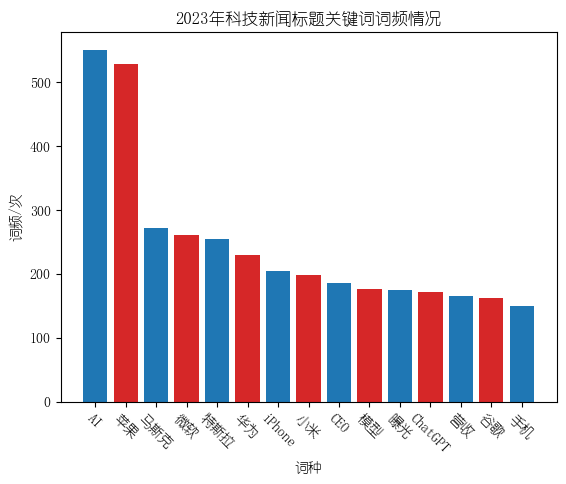

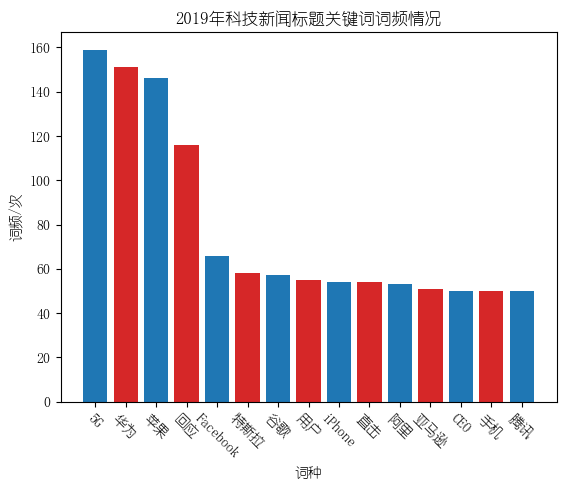

In [34]:
# 23
words_now = []
frequencies_now = []
for k, v in titles_cart_now.items():
    words_now.append(k)
    frequencies_now.append(v)
# print(words_now)
# print(frequencies_now)
plt.bar(words_now[:15], frequencies_now[:15], color=(['tab:blue', 'tab:red'] * 20))
plt.title('2023年科技新闻标题关键词词频情况')
plt.ylabel('词频/次')
plt.xlabel('词种')
plt.tick_params(axis='x', rotation=-45)
plt.show()

# 19
words_past = []
frequencies_past = []
for k, v in titles_cart_past.items():
    words_past.append(k)
    frequencies_past.append(v)
# print(words_now)
# print(frequencies_now)
plt.bar(words_past[:15], frequencies_past[:15], color=(['tab:blue', 'tab:red'] * 20))
plt.title('2019年科技新闻标题关键词词频情况')
plt.ylabel('词频/次')
plt.xlabel('词种')
plt.tick_params(axis='x', rotation=-45)
plt.show()

* 从这两张表的词种情况是能看出科技热点很强的变迁性，但也有诸如苹果这样的公司将热点绑在自己身边，为变动的世界线带来一些稳定可言。
* 曾经的AI在19年只能排到19位的词汇数目，正如今日的5G只能排到25位。
#### 结论：19年仍然是电商与老牌科技公司的时代，同时5G异军突起；23年则是AI的时代，附带有疯狂企业家的出圈（马斯克）和仍然稳坐顶流的科技公司，同时LLM的火爆也有明显体现。

## 词云图绘制
由于二者的文本词种又多又杂，遂采取词云图方式对其进行比较。

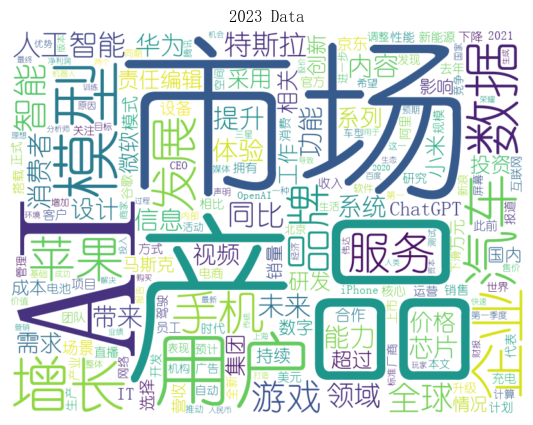

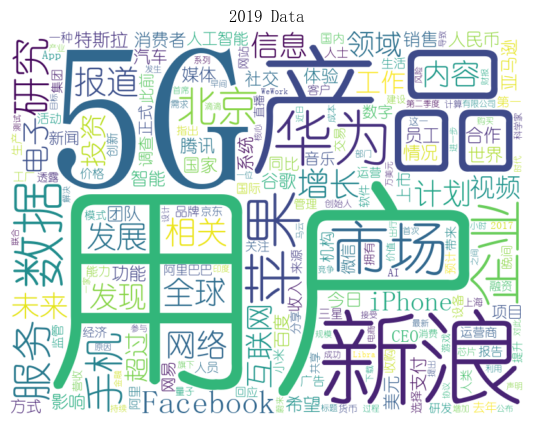

In [33]:

wordcloud1 = WordCloud(font_path="C:\\Windows\\Fonts\\SIMYOU.TTF", width=800, height=600, background_color='white').generate_from_frequencies(articles_cart_now)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('2023 Data')
plt.axis('off')
plt.show()

wordcloud2 = WordCloud(font_path="C:\\Windows\\Fonts\\SIMYOU.TTF", width=800, height=600, background_color='white').generate_from_frequencies(articles_cart_past)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('2019 Data')
plt.axis('off')
plt.show()

从以上词云图的对比中可以看出：
* 19年的5G和23年的AI、模型都是本年的科技关键词，都“昙花一现”地出现在排行前三的位置；
* “用户”和“产品”虽然依旧是科技产业最重要的部分，但是两者的词频位置的调换意味着其注重性随四年时间的变迁也有了一些变化。可能性是在于四年来产品的增多已经完全覆盖了大多数用户的需求，因此对用户需求的研究逐渐减少。
* 19年还有“北京”这一地域类词出现，随着疫情的到来，人们对开放科技的地域定位似乎也在逐渐模糊化边缘化。
* 市场的重要度在逐渐提升（毕竟2023年的经济走势并不如2019年）。
* “数据”和“企业”的位置甚至都没有过变化，仍是科技发展的两大老牌影响因素。
#### 结论：科技新闻总体文述框架的高频词较为稳定，其中当年的科技爆点/突破点将会被媒体大量宣传报道被人所知。
#### 结论：科技最注重的依然是“用户”、“产品”以及“市场”三大维度，同时科技的地域性在线上形式的工作生活由于疫情而成为刚需时表现出削弱态势，现在更加强调全球化了。